In [1]:
import cv2
from ultralytics import YOLO
import time
import matplotlib.pyplot as plt

In [2]:
# Model paths
model_paths = {
    "yolov8n": "/Users/macbook/Pengujian/videos_models/yolov8n.pt",
    "yolov8s": "/Users/macbook/Pengujian/videos_models/yolov8s.pt",
    "yolov8m": "/Users/macbook/Pengujian/videos_models/yolov8m.pt",
    "yolov8l": "/Users/macbook/Pengujian/videos_models/yolov8l.pt",
    "yolov8x": "/Users/macbook/Pengujian/videos_models/yolov8x.pt"
}


In [3]:
# CCTV stream URL
cctv_url = "http://stream.cctv.malangkota.go.id/WebRTCApp/streams/134679292061611148844449.m3u8?token=null"

# Video processing function for FPS measurement
def measure_fps_cctv(url, model_path):
    model = YOLO(model_path)
    vcap = cv2.VideoCapture(url)
    if not vcap.isOpened():
        print(f"Error: Could not open video stream {url}.")
        return

    frame_count = 0
    start_time = time.time()

    while True:
        ret, frame = vcap.read()
        if frame is None:
            break

        # Perform detection without additional processing
        _ = model(frame, conf=0.25, verbose=False)
        frame_count += 1

        # Limit to 100 frames for testing
        if frame_count >= 100:
            break

    end_time = time.time()
    total_time = end_time - start_time
    fps = frame_count / total_time

    vcap.release()
    return fps

# Measure FPS for each model using the CCTV stream
fps_results = {}

for model_name, model_path in model_paths.items():
    fps = measure_fps_cctv(cctv_url, model_path)
    fps_results[model_name] = fps
    print(f"{model_name} Measured FPS: {fps:.2f}")


[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


yolov8n Measured FPS: 2.51
yolov8s Measured FPS: 1.42
yolov8m Measured FPS: 0.61
yolov8l Measured FPS: 0.33
yolov8x Measured FPS: 0.19


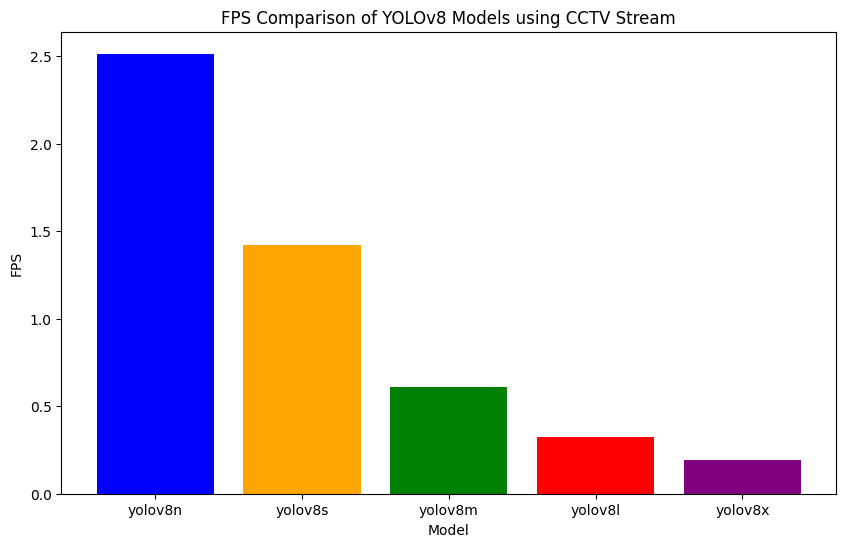

In [4]:
# Plot the FPS results
plt.figure(figsize=(10, 6))
plt.bar(fps_results.keys(), fps_results.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('FPS')
plt.title('FPS Comparison of YOLOv8 Models using CCTV Stream')
plt.show()